# CAMB: Code for Anisotropies in the Microwave Background

* Homepage de CAMB: https://camb.info

* Código ampliamente utilizado en cosmología desarrollado por Antony Lewis y Anthony Challinor

* Resuelve las ecuaciones de Boltzmann y estima observables dado un set de parámetros cosmológicos.

* Cuenta con un Python wrapper, está escrito en Fortran.

* Paper del código: https://iopscience.iop.org/article/10.1086/309179

*Trabajo inspirado en los tutoriales de Alejandro Cartés y de Vicente Pedreros*

## Primer paso: instalar CAMB y las librerías necesarias

In [1]:
#!pip install camb

#pip install camb

In [20]:
import camb
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad


print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.6.2


## Segundo paso: Defición de la cosmología 

En este caso vamos a elegir los que fueron definidos por Planck (https://arxiv.org/abs/1807.06209)

In [3]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

In [4]:
help(camb.CAMBparams)

Help on class CAMBparams in module camb.model:

class CAMBparams(camb.baseconfig.F2003Class)
 |  CAMBparams(**kwargs)
 |
 |  Object storing the parameters for a CAMB calculation, including cosmological parameters and
 |  settings for what to calculate. When a new object is instantiated, default parameters are set automatically.
 |
 |  To add a new parameter, add it to the CAMBparams type in model.f90, then  edit the _fields_ list in the CAMBparams
 |  class in model.py to add the new parameter in the corresponding location of the member list. After rebuilding the
 |  python version you can then access the parameter by using params.new_parameter_name where params is a CAMBparams
 |  instance. You could also modify the wrapper functions to set the field value less directly.
 |
 |  You can view the set of underlying parameters used by the Fortran code by printing the CAMBparams instance.
 |  In python, to set cosmology parameters it is usually best to use :meth:`set_cosmology` and
 |  equ

### Opción 1: camb.CAMBparams()

In [5]:
# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [6]:
# Podemos cambiar los parámetros una vez definidos

pars.set_dark_energy(w=-1)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [7]:
# Ahora, para obtener resultados podemos simplemente

results = camb.get_results(pars)

In [8]:
results

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 0.9
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2500
   max_l_tensor = 600
   max_eta_k = 6250.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.0224
   omch2 = 0.12
   omk = 0.0
   omnuh2 = 0.000644866570625114
   H0 = 67.4
   TCMB = 2.7255
   YHe = 0.24586829360147697
   num_nu_massless = 2.0293333333333337
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0146666666666666]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   I

### Opción 2: camb.set_params()

In [9]:
pars2 = camb.set_params(H0=67.4, w=-0.1, cs2=0.1)
results2 = camb.get_results(pars2)

## Parámetro de Hubble

0.0003332222592469177


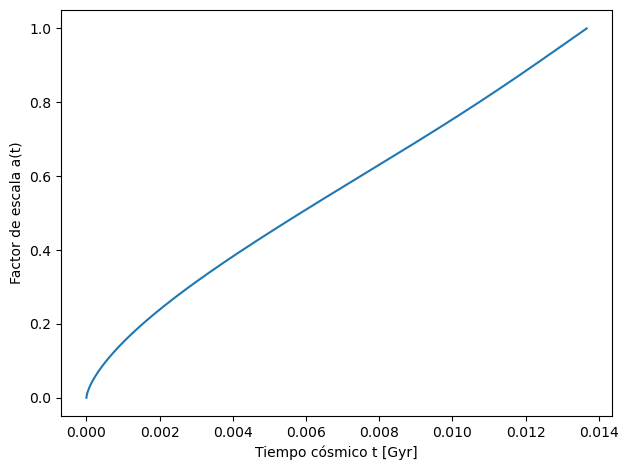

Edad (aprox) del Universo: 0.014 Gyr (con zmax=3000.0)


In [22]:
# Definir cosmología

H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054


# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)
results = camb.get_background(pars)

# Malla en z y conversión a a
zmax = 3000.0
Nz   = 6000
z    = np.linspace(0.0, zmax, Nz)          # z creciente → a decreciente
a    = 1.0/(1.0 + z)
Hz   = results.hubble_parameter(z)          # km/s/Mpc

# ---- 2) Pasar H a unidades SI (1/s)
Mpc_to_km = 3.085677581491367e19
H_si = Hz * 1000.0 / Mpc_to_km             # 1/s

# ---- 3) Construir H_func(a) por interpolación
# Reordenar por a creciente
ord_idx = np.argsort(a)
a_sorted  = a[ord_idx]
H_sorted  = H_si[ord_idx]

# Interpolador. 'bounds_error=False' para permitir extrapolación (mejor evitar usarla).
H_func = interp1d(a_sorted, H_sorted, kind='cubic', bounds_error=False, fill_value='extrapolate')

# ---- 4) Definir integrando dt/da = 1/(a H(a))
def dt_da(a_):
    return 1.0 / (a_ * H_func(a_))

# El mínimo 'a' confiable es el más pequeño que te da CAMB:
a_min = a_sorted[0]      # = 1/(1+zmax)

print(a_min)
a_max = 1.0              # hoy

# ---- 5A) t(a) con quad punto a punto (para graficar a(t))
# Construimos una malla de 'a' en [a_min, 1] y calculamos t(a_i) = ∫_{a_min}^{a_i} da'/(a'H(a'))
a_grid = np.linspace(a_min, a_max, 800)

t_grid = np.empty_like(a_grid)
t0 = 0.0
# Para eficiencia, integramos incrementalmente en tramos (acumular errores pequeños)
for i in range(len(a_grid)):
    if i == 0:
        t_grid[i] = 0.0
    else:
        # integrar del a_grid[i-1] al a_grid[i]
        ti, err = quad(dt_da, a_grid[i-1], a_grid[i], epsabs=0, epsrel=1e-6, limit=200)
        t0 += ti
        t_grid[i] = t0

# ---- 6) Pasar t a Gyr y graficar a(t)
sec_to_Gyr = 1.0 / (3600.0*24.0*365.25*1e9)
t_Gyr = t_grid * sec_to_Gyr

plt.plot(t_Gyr, a_grid)
plt.xlabel("Tiempo cósmico t [Gyr]")
plt.ylabel("Factor de escala a(t)")
plt.tight_layout()
plt.show()

# Edad del Universo (desde a_min hasta a=1). Si zmax es lo bastante grande, esto ≈ edad total.
edad_universo_Gyr = t_Gyr[-1]
print(f"Edad (aprox) del Universo: {edad_universo_Gyr:.3f} Gyr (con zmax={zmax})")


In [17]:
# Creamos la cosmología
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)
results = camb.get_background(pars)

# Obtenemos H(z) en una malla
z = np.linspace(0, 3000, 5000)  # hasta recombinación
a = 1/(1+z)
Hz = results.hubble_parameter(z)  # en km/s/Mpc

print(Hz / H0)


[1.00000000e+00 1.40453874e+00 2.00795805e+00 ... 1.25982423e+05
 1.26026133e+05 1.26069849e+05]


In [18]:
# Convertimos H a unidades 1/s
H0 = 67.5  # km/s/Mpc
Mpc_to_km = 3.086e19
H_si = Hz * 1000 / Mpc_to_km  # 1/s

from scipy.integrate import quad

def integrando(a, H_func):
    return 1.0 / (a * H_func(a))

t, err = quad(integrando, 1e-6, 1.0, args=(H_func,))
print("Tiempo en unidades de 1/H0:", t)

# Graficamos a(t)
plt.plot(t/ (3.15e16*1e9), a)  # tiempo en Gyr
plt.xlabel("Tiempo [Gyr]")
plt.ylabel("Factor de escala a(t)")
plt.show()

NameError: name 'H_func' is not defined

In [16]:
np.sum(Hz)

np.float64(15818568101.204975)

In [ ]:
# Integramos dt/da = 1 / (a H(a))
dt_da = 1.0 / (a * H_si)  # (1 / a) * (a / (da / dt))
da = np.diff(a)
t = np.concatenate(([0], np.cumsum((dt_da[:-1] + dt_da[1:]) / 2 * da)))